<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Esmail\AppData\Local\Temp\ipykernel_22360\2103055614.py:20: SyntaxWarning: invalid escape sequence '\s'
  model_file = "..\sd_data\\v1-5-pruned-emaonly.ckpt"
C:\Users\Esmail\AppData\Local\Temp\ipykernel_22360\2103055614.py:15: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Using device: cpu


100%|██████████| 50/50 [1:09:30<00:00, 83.41s/it]


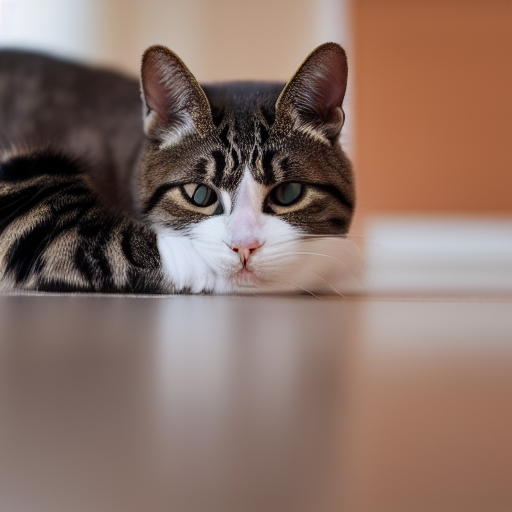

In [7]:
from nanograd.models.stable_diffusion import model_loader
from nanograd.models.stable_diffusion import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("nanograd\models\stable_diffusion\sd_data\\tokenizer_vocab.json", merges_file="nanograd\models\stable_diffusion\sd_data\\tokenizer_merges.txt")
model_file = "nanograd\models\stable_diffusion\sd_data\\v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

prompt = input("Enter your prompt: ")
# prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
# image_path = "../images/dog.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42


if __name__ == "__main__":
    output_image = pipeline.generate(
        prompt=prompt,
        uncond_prompt=uncond_prompt,
        input_image=input_image,
        strength=strength,
        do_cfg=do_cfg,
        cfg_scale=cfg_scale,8
        sampler_name=sampler,
        n_inference_steps=num_inference_steps,
        seed=seed,
        models=models,
        device=DEVICE,
        idle_device="cpu",
        tokenizer=tokenizer,
    )

    output_image = Image.fromarray(output_image)
    output_path = "nanograd\models\stable_diffusion\sd\output_image.png"
    output_image.save(output_path)
    print(f"Image saved as {output_path}")

    